Saving Data19.xlsx to Data19 (1).xlsx
Column names in the DataFrame:
Index(['obs', 'GS3M', 'GS6M'], dtype='object')

Unit root tests for GS3M:
ADF Test:
  Statistic: -1.5391858164849086
  p-value: 0.514045363282407
  Critical Values:
    1%: -3.460018927623594
    5%: -2.8745897386146817
    10%: -2.57372514086348
  Interpretation: ADF test fails to reject null hypothesis - series is non-stationary.

KPSS Test:
  Statistic: 1.4539907692315281
  p-value: 0.01
  Critical Values:
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
  Interpretation: KPSS test rejects null hypothesis - series is non-stationary.

Unit root tests for GS6M:
ADF Test:
  Statistic: -3.7738194363438047
  p-value: 0.003186826077188909
  Critical Values:
    1%: -3.458854867412691
    5%: -2.8740800599399323
    10%: -2.573453223097503
  Interpretation: ADF test rejects null hypothesis - series is stationary.

KPSS Test:
  Statistic: 1.4960862818466591
  p-value: 0.01
  Critical Values:
    10%: 0.347
    5%

/tmp/ipython-input-8698133.py:58: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' for constant
/tmp/ipython-input-8698133.py:58: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')  # 'c' for constant


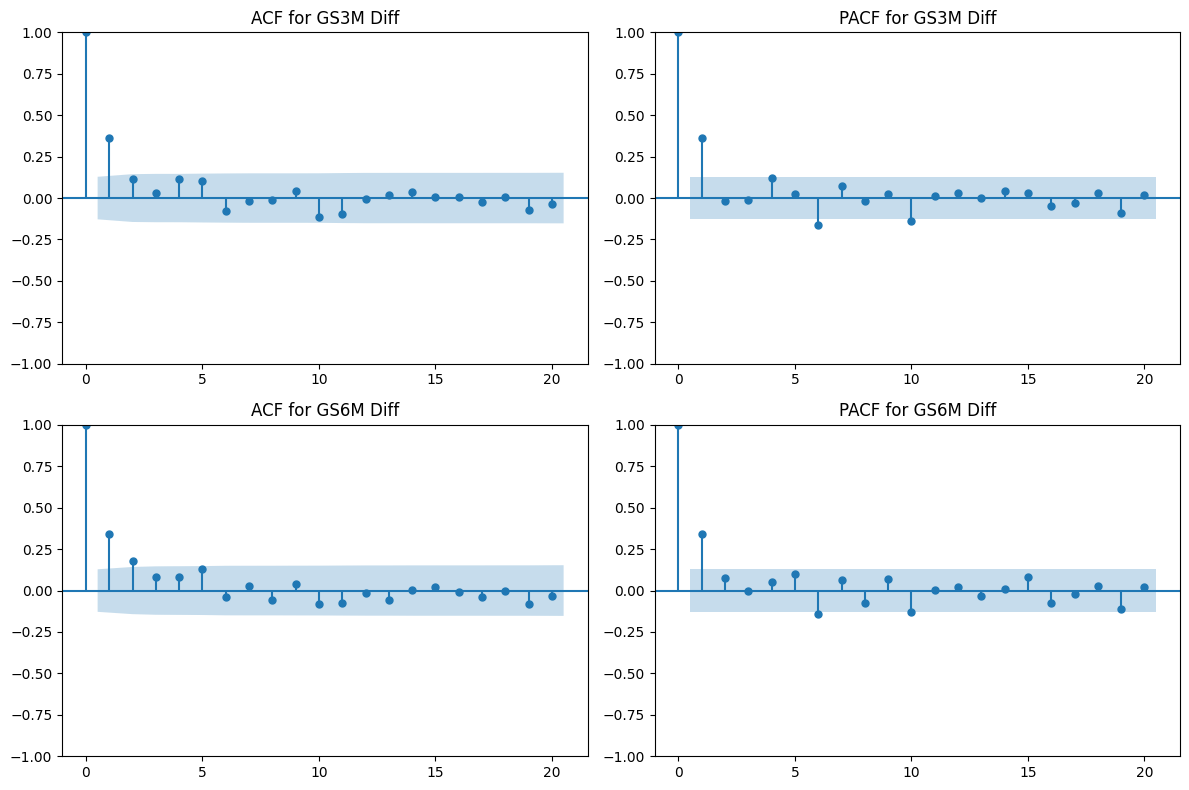

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot


Best ARMA order for GS3M Diff: (3, 2), AIC: 130.09317344978928
  Interpretation: The selected ARMA model has the lowest AIC among the tried orders, indicating the best fit for forecasting or modeling the series.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot


Best ARMA order for GS6M Diff: (3, 2), AIC: 127.25165542187898
  Interpretation: The selected ARMA model has the lowest AIC among the tried orders, indicating the best fit for forecasting or modeling the series.

Johansen Cointegration Test:
Trace Statistics:
[52.36462346 15.02232689]

Critical Values (90%, 95%, 99%):
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Cointegration exists at rank 0 (trace 52.364623457020045 > 15.4943 at 95% confidence)
  Interpretation: Evidence of cointegration suggests a long-run equilibrium relationship between the series.
Cointegration exists at rank 1 (trace 15.022326889429346 > 3.8415 at 95% confidence)
  Interpretation: Evidence of cointegration suggests a long-run equilibrium relationship between the series.


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


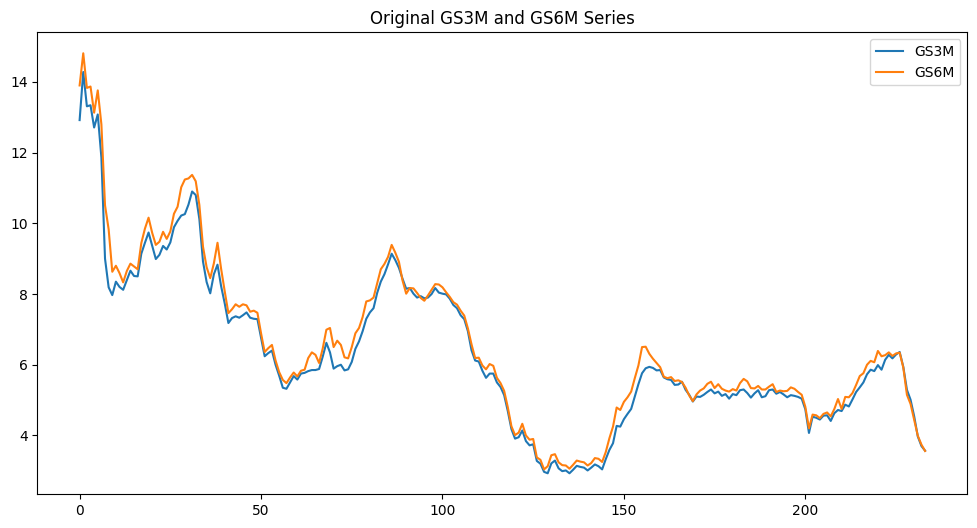

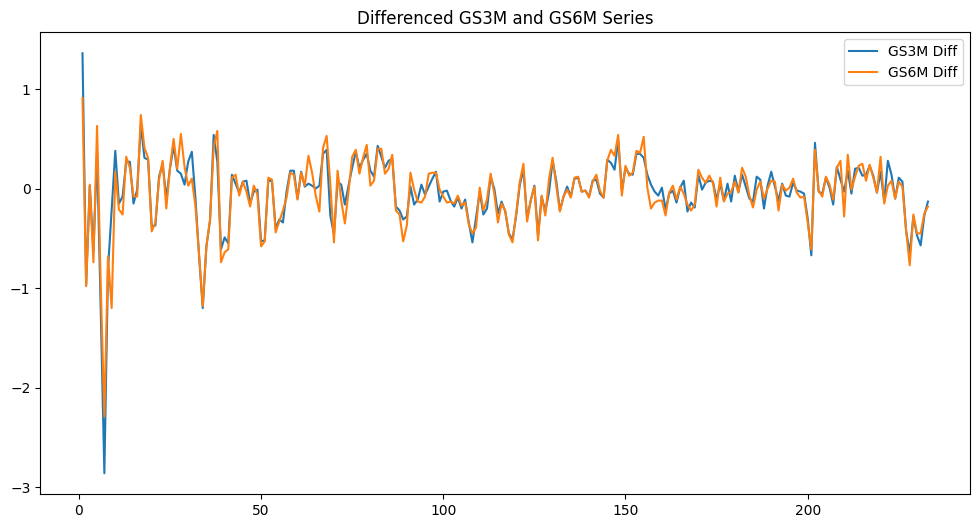

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files

# Prompt user to upload the Excel file
uploaded = files.upload()

# Assuming the file is uploaded as 'Data19.xls', read it into a DataFrame
file_name = list(uploaded.keys())[0]
if file_name != 'Data19.xls':
    print("Warning: Uploaded file name does not match 'Data19.xls'. Proceeding with the uploaded file.")
df = pd.read_excel(file_name)

# Print column names
print("Column names in the DataFrame:")
print(df.columns)

# Extract the series from specified columns with error handling
try:
    gs3m = df['GS3M']
    gs6m = df['GS6M']
except KeyError as e:
    print(f"Error: Column not found - {e}. Please ensure the Excel file contains 'GS3M' and 'GS6M' columns.")
    raise  # Stop execution if columns are missing

# Align both series by truncating to the same length (shorter one)
min_len = min(len(gs3m), len(gs6m))
gs3m = gs3m.iloc[:min_len]
gs6m = gs6m.iloc[:min_len]

# Define function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit root tests for {name}:")

    # ADF test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f"  Statistic: {adf_result[0]}")
    print(f"  p-value: {adf_result[1]}")
    print("  Critical Values:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value}")

    # Interpretation for ADF
    if adf_result[1] < 0.05:
        print("  Interpretation: ADF test rejects null hypothesis - series is stationary.")
    else:
        print("  Interpretation: ADF test fails to reject null hypothesis - series is non-stationary.")

    # KPSS test
    kpss_result = kpss(series, regression='c')  # 'c' for constant
    print("\nKPSS Test:")
    print(f"  Statistic: {kpss_result[0]}")
    print(f"  p-value: {kpss_result[1]}")
    print("  Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"    {key}: {value}")

    # Interpretation for KPSS
    if kpss_result[1] < 0.05:
        print("  Interpretation: KPSS test rejects null hypothesis - series is non-stationary.")
    else:
        print("  Interpretation: KPSS test fails to reject null hypothesis - series is stationary.")

# Apply unit root tests to both series
unit_root_tests(gs3m, 'GS3M')
unit_root_tests(gs6m, 'GS6M')

# Difference both series to make them stationary
gs3m_diff = gs3m.diff().dropna()
gs6m_diff = gs6m.diff().dropna()

# Re-align differenced series (in case of any mismatch after diff)
min_diff_len = min(len(gs3m_diff), len(gs6m_diff))
gs3m_diff = gs3m_diff.iloc[:min_diff_len]
gs6m_diff = gs6m_diff.iloc[:min_diff_len]

# Plot ACF and PACF for differenced series
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

plot_acf(gs3m_diff, ax=axes[0, 0], lags=20)
axes[0, 0].set_title('ACF for GS3M Diff')

plot_pacf(gs3m_diff, ax=axes[0, 1], lags=20)
axes[0, 1].set_title('PACF for GS3M Diff')

plot_acf(gs6m_diff, ax=axes[1, 0], lags=20)
axes[1, 0].set_title('ACF for GS6M Diff')

plot_pacf(gs6m_diff, ax=axes[1, 1], lags=20)
axes[1, 1].set_title('PACF for GS6M Diff')

plt.tight_layout()
plt.show()

# Define function to find best ARMA model
def find_best_arma(series, name, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                # ARMA(p,q) is ARIMA(p,0,q)
                model = ARIMA(series, order=(p, 0, q)).fit()
                aic = model.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                    best_model = model
            except Exception as e:
                print(f"Failed to fit ARMA({p},{q}) for {name}: {e}")
                continue

    if best_order:
        print(f"\nBest ARMA order for {name}: {best_order}, AIC: {best_aic}")
        print("  Interpretation: The selected ARMA model has the lowest AIC among the tried orders, indicating the best fit for forecasting or modeling the series.")
    else:
        print(f"No valid ARMA model found for {name}")

    return best_model

# Apply to differenced series
best_arma_gs3m = find_best_arma(gs3m_diff, 'GS3M Diff')
best_arma_gs6m = find_best_arma(gs6m_diff, 'GS6M Diff')

# Perform Johansen cointegration test on original series
data = pd.DataFrame({'GS3M': gs3m, 'GS6M': gs6m})
joh_result = coint_johansen(data, det_order=0, k_ar_diff=1)

# Print trace statistics and critical values
print("\nJohansen Cointegration Test:")
print("Trace Statistics:")
print(joh_result.lr1)
print("\nCritical Values (90%, 95%, 99%):")
print(joh_result.cvt)

# Check for cointegration at each rank r at 95% confidence
for r in range(len(joh_result.lr1)):
    trace_stat = joh_result.lr1[r]
    crit_95 = joh_result.cvt[r, 1]  # 95% critical value (index 1)
    if trace_stat > crit_95:
        print(f"Cointegration exists at rank {r} (trace {trace_stat} > {crit_95} at 95% confidence)")
        print("  Interpretation: Evidence of cointegration suggests a long-run equilibrium relationship between the series.")
    else:
        print(f"No cointegration at rank {r} (trace {trace_stat} <= {crit_95} at 95% confidence)")
        print("  Interpretation: No evidence of cointegration at this rank.")

# Plot the series
plt.figure(figsize=(12, 6))
plt.plot(gs3m, label='GS3M')
plt.plot(gs6m, label='GS6M')
plt.title('Original GS3M and GS6M Series')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(gs3m_diff, label='GS3M Diff')
plt.plot(gs6m_diff, label='GS6M Diff')
plt.title('Differenced GS3M and GS6M Series')
plt.legend()
plt.show()

In [ ]:
# PARA EXPORTAR

from google.colab import files
import nbformat
from nbconvert import HTMLExporter

# Paso 1: Cargar tu archivo .ipynb
print("Por favor, selecciona tu archivo .ipynb")
uploaded = files.upload()

# Paso 2: Obtener el nombre del archivo cargado
notebook_filename = list(uploaded.keys())[0]
print(f"\nArchivo cargado: {notebook_filename}")

# Paso 3: Leer el notebook
with open(notebook_filename, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Paso 4: Convertir a HTML
print("Convirtiendo a HTML...")
html_exporter = HTMLExporter()
html_exporter.template_name = 'classic'
(body, resources) = html_exporter.from_notebook_node(notebook)

# Paso 5: Guardar el archivo HTML
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f"Conversión completada: {html_filename}")

# Paso 6: Descargar el archivo HTML
print("Descargando archivo HTML...")
files.download(html_filename)
print("¡Listo! Tu archivo HTML ha sido descargado.")

Por favor, selecciona tu archivo .ipynb


Saving Pregunta18.ipynb to Pregunta18.ipynb

Archivo cargado: Pregunta18.ipynb
Convirtiendo a HTML...
Conversión completada: Pregunta18.html
Descargando archivo HTML...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Listo! Tu archivo HTML ha sido descargado.
